<a href="https://colab.research.google.com/github/arush-gupta/Monte-Carlo/blob/main/Pi_using_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Say we have a circle with radius = 1, enclosed in a square of side length 2


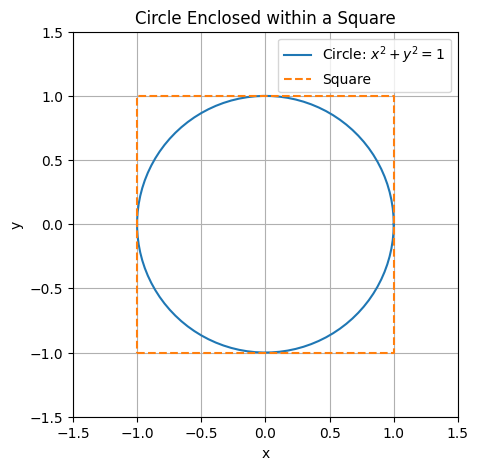

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate points on the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Define square vertices
x_square = [-1, 1, 1, -1, -1]
y_square = [-1, -1, 1, 1, -1]

# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(x_circle, y_circle, label='Circle: $x^2 + y^2 = 1$')
plt.plot(x_square, y_square, label='Square', linestyle='dashed')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio
plt.title('Circle Enclosed within a Square')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


The usual way to imagine the Monte Carlo method in this example is to imagine darts thrown at the square in a manner that all areas of the square are uniformly covered.

The number of darts lying in an area serve as a good estimation to the proportion of area they cover. It follows that the ratio of the number of darts that lie inside the circle to the number of total darts will be a good estimate of the ratio of the areas of the two, given that the entire area of the square is effectively covered. The estimation of the ratio will improve with an increase in the number of darts.

Let's calculate the value of pi by throwing 10,000 point-sized darts on the square

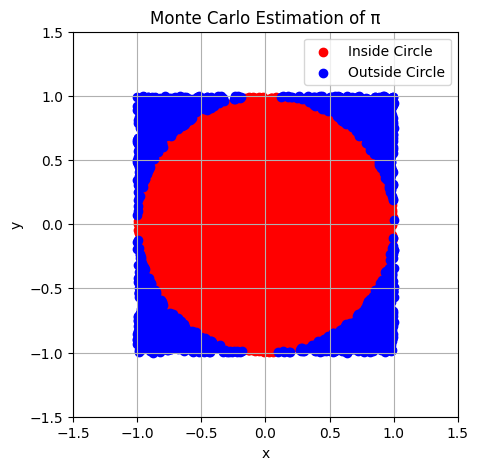

Estimated value of π: 3.1616


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Number of random points to simulate
num_points = 10000

# Generate random points within the square [-1, 1] x [-1, 1]
x_rand = np.random.uniform(-1, 1, num_points)
y_rand = np.random.uniform(-1, 1, num_points)

# Calculate the distance from the origin for each point
distance = np.sqrt(x_rand**2 + y_rand**2)

# Determine which points are inside the circle
inside_circle = distance <= 1

# Count points inside and outside the circle
num_inside = np.sum(inside_circle)
num_outside = num_points - num_inside

# Estimate the value of pi
estimated_pi = 4 * (num_inside / num_points)

# Separate points inside and outside the circle for plotting
x_inside = x_rand[inside_circle]
y_inside = y_rand[inside_circle]
x_outside = x_rand[~inside_circle]
y_outside = y_rand[~inside_circle]

# Create the plot
plt.figure(figsize=(5, 5))
plt.scatter(x_inside, y_inside, color='red', label='Inside Circle')
plt.scatter(x_outside, y_outside, color='blue', label='Outside Circle')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio
plt.title('Monte Carlo Estimation of π')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated value of π:", estimated_pi)


The darts falling inside the circle are coloured red, and the darts falling outside the circle but inside the square are coloured blue.

Now, we analyse the data from a 1000 Monte Carlo simulations; this time, we use a million point-sized darts instead of 10,000

In [8]:
import random

def monte_carlo_pi(num_samples):
    inside_circle = 0
    for _ in range(num_samples):
        x = random.random()  # Random x coordinate between 0 and 1
        y = random.random()  # Random y coordinate between 0 and 1
        distance = x**2 + y**2  # Calculate the distance from the origin
        if distance <= 1:  # Check if the point is inside the unit circle
            inside_circle += 1

    estimated_pi = (inside_circle / num_samples) * 4
    return estimated_pi

num_samples = 1000000  # Number of random points to generate
estimated_pi = monte_carlo_pi(num_samples)
print("Estimated Value of π:", estimated_pi)


Estimated Value of π: 3.142172


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
pi_data = np.array([])
iter = 1000
num_samples = 1000000

for _ in tqdm(range(iter)):
  pi_data = np.append(pi_data,monte_carlo_pi(num_samples))



100%|██████████| 1000/1000 [09:28<00:00,  1.76it/s]


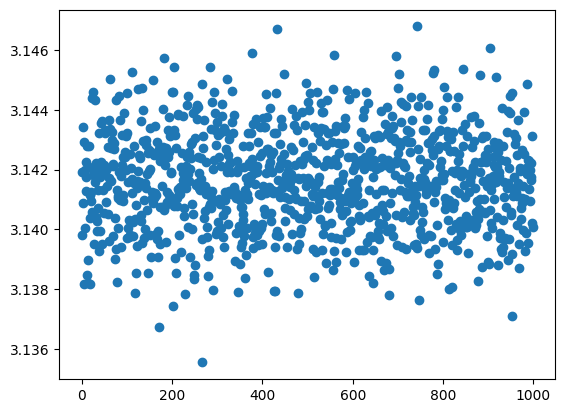

In [10]:
plt.scatter(np.arange(np.shape(pi_data)[0]),pi_data)

From the above scatter plot, it is difficult to visualize how exactly the simulated values of pi bundle up together (where they accumulate and where they are scarce).  Histograms are useful ways to visualize distribution of values over intervals.

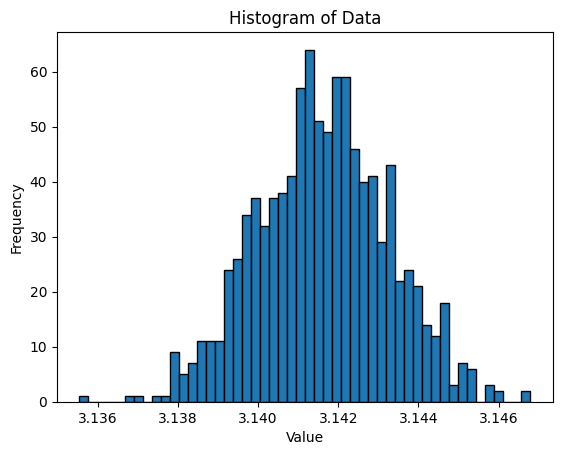

In [11]:
plt.hist(pi_data, bins=50, edgecolor='black')  # 'bins' parameter determines the number of bins
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

In [16]:
#The following array was needed to plot the scatter plot- it's just an array of indices contained in pi_data
np.arange(np.shape(pi_data)[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18